<a href="https://colab.research.google.com/github/pkolakal/IT7103/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.dropna(inplace=True)

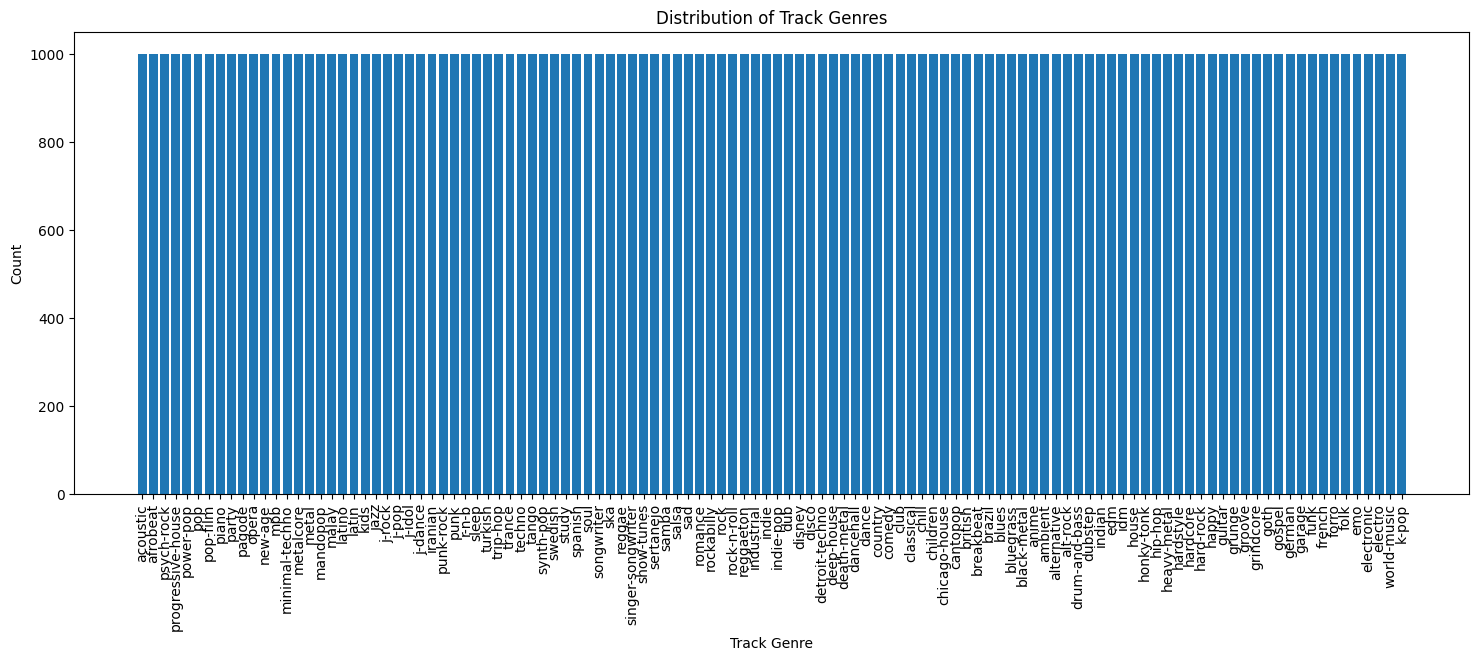

In [ ]:
import matplotlib.pyplot as plt

genre_counts = df['track_genre'].value_counts()

plt.figure(figsize=(18, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Track Genre')
plt.ylabel('Count')
plt.title('Distribution of Track Genres')
plt.xticks(rotation=90)
plt.show()

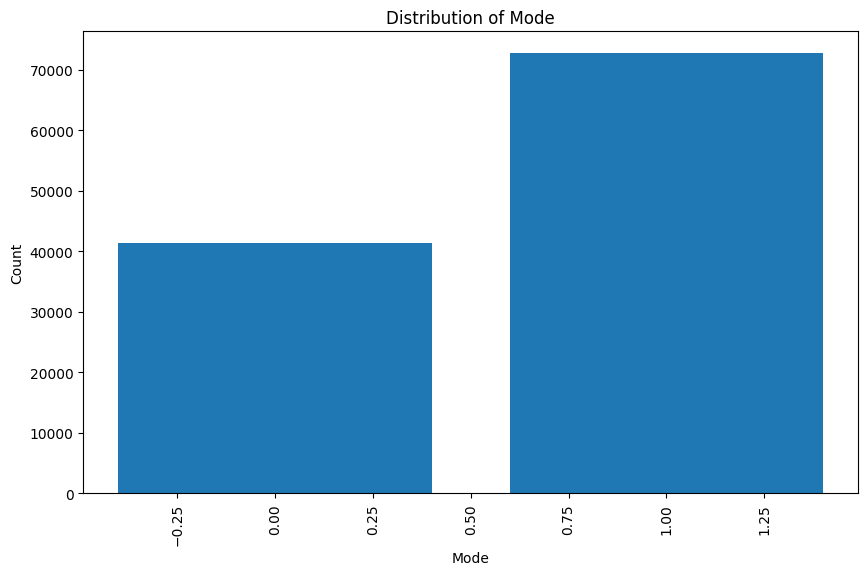

In [ ]:
mode = df['mode'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(mode.index, mode.values)
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Distribution of Mode')
plt.xticks(rotation=90)
plt.show()

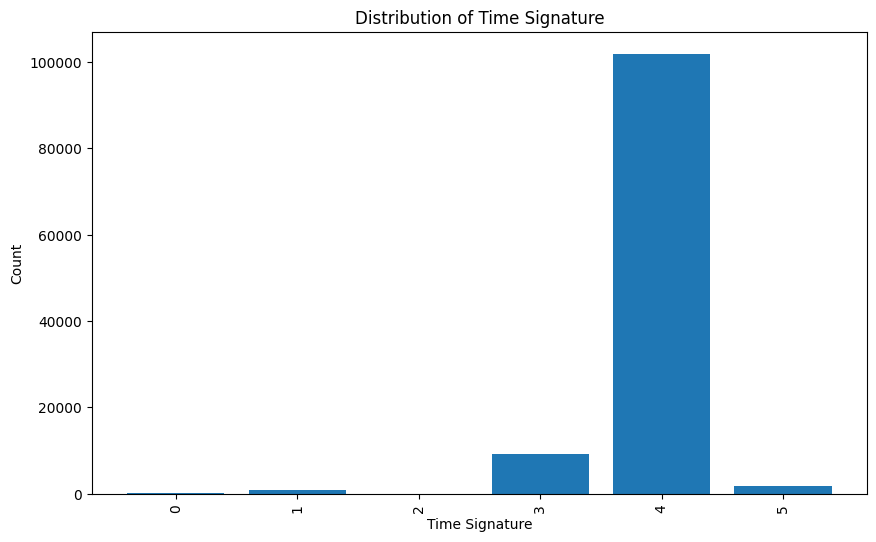

In [ ]:
time_signature = df['time_signature'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(time_signature.index, time_signature.values)
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Distribution of Time Signature')
plt.xticks(rotation=90)
plt.show()

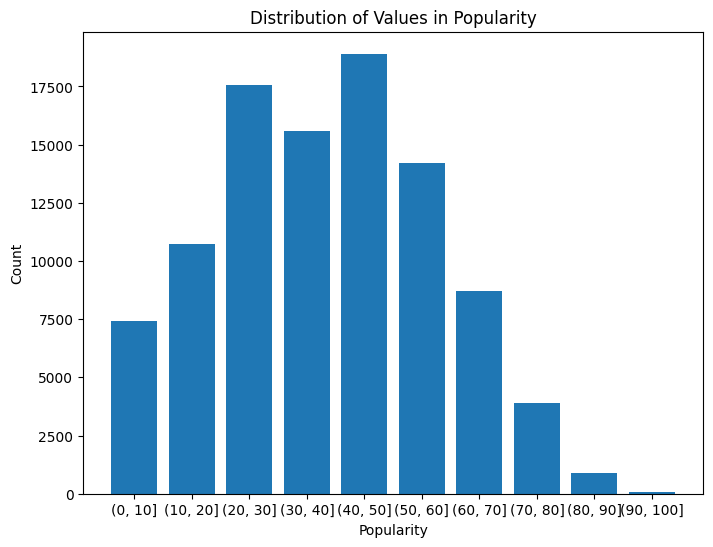

In [ ]:
intervals = range(0, 101, 10)
counts = pd.cut(df['popularity'], intervals).value_counts(sort=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Values in Popularity')
plt.show()

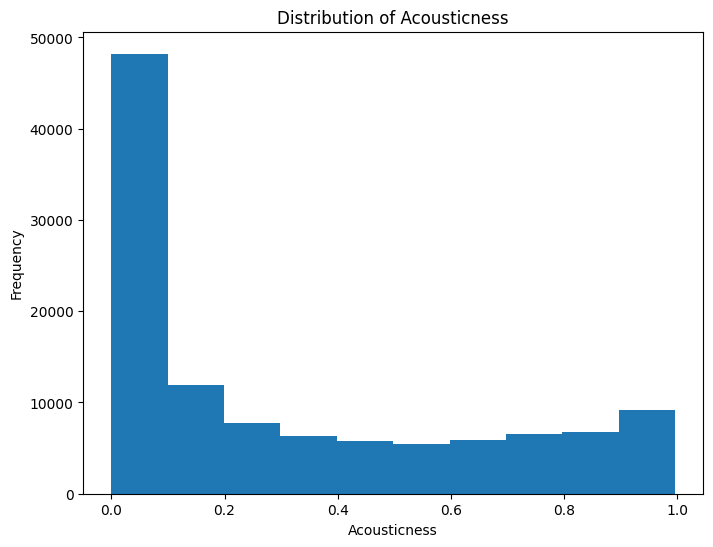

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['acousticness'], bins=10)
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.show()

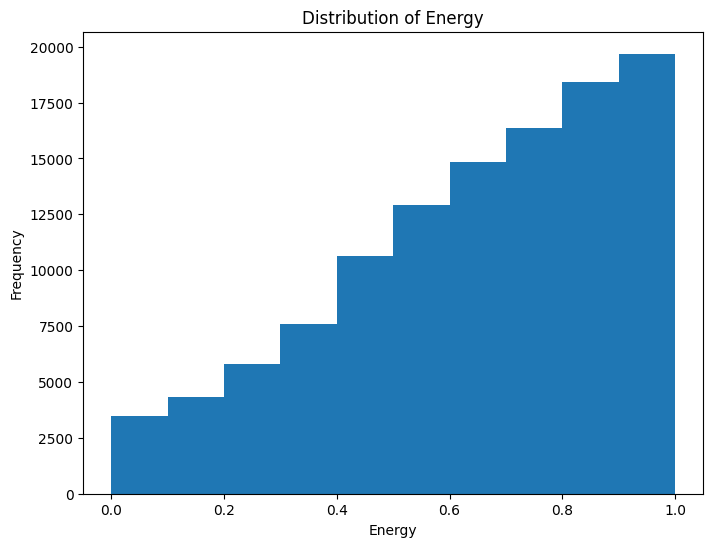

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['energy'], bins=10)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.show()

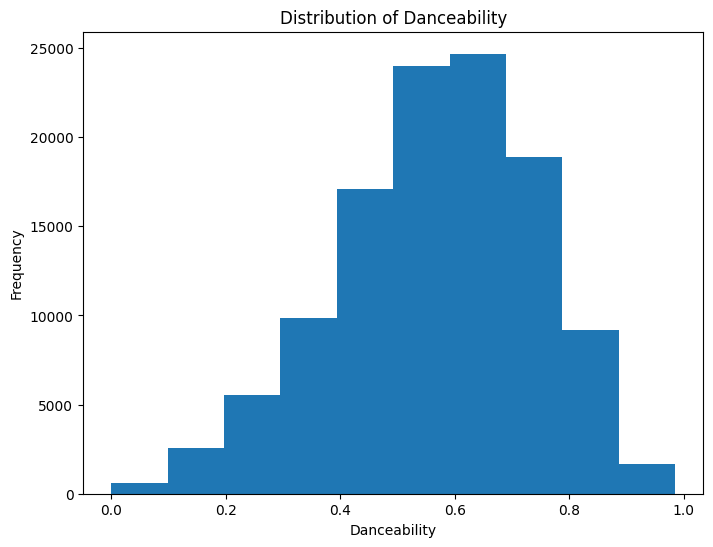

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['danceability'], bins=10)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

In [ ]:
numeric_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
categorical_features = ['explicit', 'key', 'mode', 'time_signature']

In [ ]:
y = df['track_genre']
x = df[numeric_features + categorical_features]

In [ ]:
print(x.columns)

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'explicit', 'key', 'mode', 'time_signature'],
      dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
import numpy as np

In [ ]:
symmetric_columns = []
skewed_columns = []

for column in numeric_features:
    if df[column].skew() > -1 and df[column].skew() < 1:
        symmetric_columns.append(column)
    else:
        skewed_columns.append(column)

In [ ]:
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standardizer', StandardScaler())
])

numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=False)),
    ('standardizer', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numeric_symmetric', numeric_symmetric_pipeline, symmetric_columns),
    ('numeric_skewed', numeric_skewed_pipeline, skewed_columns),
    ('categorical', categorical_pipeline, categorical_features)
])

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
pipeline.fit(x)
train_transformed = pipeline.transform(train_x)
test_transformed = pipeline.transform(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


### preprocessing y values

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)

train_transformed_y = label_encoder.transform(train_y)
test_transformed_y = label_encoder.transform(test_y)

In [ ]:
print(train_transformed.shape)
print(test_transformed.shape)
print(train_transformed_y.shape)
print(test_transformed_y.shape)

(85499, 32)
(28500, 32)
(85499,)
(28500,)


In [ ]:
train_transformed = np.nan_to_num(train_transformed, nan=0)
test_transformed = np.nan_to_num(test_transformed, nan=0)

In [ ]:
import math

for i in range(train_transformed.shape[0]):
  for j in range(train_transformed.shape[1]):
    if math.isnan(train_transformed[i][j]):
      print(i, j)

### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(train_transformed, train_transformed_y)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_pred = svm_model.predict(test_transformed)

SVM Accuracy: 27.58%
SVM Precision: 27.58%
SVM Recall: 27.58%
SVM F1 Score: 27.58%


In [ ]:
svm_accuracy = 1- accuracy_score(test_transformed_y, svm_pred)
svm_precision = 1- precision_score(test_transformed_y, svm_pred, average="micro")
svm_recall = 1- recall_score(test_transformed_y, svm_pred, average="micro")
svm_f1 = 1- f1_score(test_transformed_y, svm_pred, average="micro")

print(f"SVM Accuracy: {round(svm_accuracy * 100, 2)}%")
print(f"SVM Precision: {round(svm_precision * 100, 2)}%")
print(f"SVM Recall: {round(svm_recall * 100, 2)}%")
print(f"SVM F1 Score: {round(svm_f1 * 100, 2)}%")

SVM Accuracy: 72.42%
SVM Precision: 72.42%
SVM Recall: 72.42%
SVM F1 Score: 72.42%


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0).fit(train_transformed, train_transformed_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
log_pred = log_model.predict(test_transformed)

In [ ]:
log_accuracy = 1- accuracy_score(test_transformed_y, log_pred)
log_precision = 1- precision_score(test_transformed_y, log_pred, average="micro")
log_recall = 1- recall_score(test_transformed_y, log_pred, average="micro")
log_f1 = 1- f1_score(test_transformed_y, log_pred, average="micro")

print(f"Logistic Regression Accuracy: {round(log_accuracy * 100, 2)}%")
print(f"Logistic Regression Precision: {round(log_precision * 100, 2)}%")
print(f"Logistic Regression Recall: {round(log_recall * 100, 2)}%")
print(f"Logistic Regression F1 Score: {round(log_f1 * 100, 2)}%")

Logistic Regression Accuracy: 80.27%
Logistic Regression Precision: 80.27%
Logistic Regression Recall: 80.27%
Logistic Regression F1 Score: 80.27%


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_transformed, train_transformed_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_pred = neigh.predict(test_transformed)

In [ ]:
knn_accuracy = 1- accuracy_score(test_transformed_y, knn_pred)
knn_precision = 1- precision_score(test_transformed_y, knn_pred, average="micro")
knn_recall = 1- recall_score(test_transformed_y, knn_pred, average="micro")
knn_f1 = 1- f1_score(test_transformed_y, knn_pred, average="micro")

print(f"KNN Accuracy: {round(knn_accuracy * 100, 2)}%")
print(f"KNN Precision: {round(knn_precision * 100, 2)}%")
print(f"KNN Recall: {round(knn_recall * 100, 2)}%")
print(f"KNN F1 Score: {round(knn_f1 * 100, 2)}%")

KNN Accuracy: 81.62%
KNN Precision: 81.62%
KNN Recall: 81.62%
KNN F1 Score: 81.62%


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(train_transformed, train_transformed_y)

DecisionTreeClassifier(random_state=0)

In [ ]:
dt_pred = dt_model.predict(test_transformed)

In [ ]:
dt_accuracy = 1- accuracy_score(test_transformed_y, dt_pred)
dt_precision = 1- precision_score(test_transformed_y, dt_pred, average="micro")
dt_recall = 1- recall_score(test_transformed_y, dt_pred, average="micro")
dt_f1 = 1- f1_score(test_transformed_y, dt_pred, average="micro")

print(f"Decision Tree Accuracy: {round(dt_accuracy * 100, 2)}%")
print(f"Decision Tree Precision: {round(dt_precision * 100, 2)}%")
print(f"Decision Tree Recall: {round(dt_recall * 100, 2)}%")
print(f"Decision Tree F1 Score: {round(dt_f1 * 100, 2)}%")

Decision Tree Accuracy: 78.72%
Decision Tree Precision: 78.72%
Decision Tree Recall: 78.72%
Decision Tree F1 Score: 78.72%


### Gausian Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(train_transformed, train_transformed_y)

GaussianNB()

In [ ]:
gnb_pred = gnb_model.predict(test_transformed)

In [ ]:
gnb_accuracy = 1- accuracy_score(test_transformed_y, gnb_pred)
gnb_precision = 1- precision_score(test_transformed_y, gnb_pred, average="micro")
gnb_recall = 1- recall_score(test_transformed_y, gnb_pred, average="micro")
gnb_f1 = 1- f1_score(test_transformed_y, gnb_pred, average="micro")

print(f"GaussianNB Accuracy: {round(gnb_accuracy * 100, 2)}%")
print(f"GaussianNB Precision: {round(gnb_precision * 100, 2)}%")
print(f"GaussianNB Recall: {round(gnb_recall * 100, 2)}%")
print(f"GaussianNB F1 Score: {round(gnb_f1 * 100, 2)}%")

GaussianNB Accuracy: 92.84%
GaussianNB Precision: 92.84%
GaussianNB Recall: 92.84%
GaussianNB F1 Score: 92.84%


### Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

rc_model = GaussianNB()
rc_model.fit(train_transformed, train_transformed_y)

GaussianNB()

In [ ]:
rc_pred = rc_model.predict(test_transformed)

rc_accuracy = 1- accuracy_score(test_transformed_y, rc_pred)
rc_precision = 1- precision_score(test_transformed_y, rc_pred, average="micro")
rc_recall = 1- recall_score(test_transformed_y, rc_pred, average="micro")
rc_f1 = 1- f1_score(test_transformed_y, rc_pred, average="micro")

print(f"RidgeClassifier Accuracy: {round(rc_accuracy * 100, 2)}%")
print(f"RidgeClassifier Precision: {round(rc_precision * 100, 2)}%")
print(f"RidgeClassifier Recall: {round(rc_recall * 100, 2)}%")
print(f"RidgeClassifier F1 Score: {round(rc_f1 * 100, 2)}%")

RidgeClassifier Accuracy: 92.84%
RidgeClassifier Precision: 92.84%
RidgeClassifier Recall: 92.84%
RidgeClassifier F1 Score: 92.84%
